This model was developed by Permamodel workgroup.

Basic theory is Kudryavtsev's method.

Reference:

        Anisimov, O. A., Shiklomanov, N. I., & Nelson, F. E. (1997).
        Global warming and active-layer thickness: results from transient general circulation models.
        Global and Planetary Change, 15(3), 61-77.

In [2]:
import os,sys

sys.path.append('../../permamodel/')

from permamodel.components import bmi_Ku_component
from permamodel import examples_directory
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap, addcyclic
import matplotlib as mpl

print examples_directory

cfg_file = os.path.join(examples_directory, 'Ku_method_2D.cfg')
x = bmi_Ku_component.BmiKuMethod()

x.initialize(cfg_file)
y0 = x.get_value('datetime__start')
y1 = x.get_value('datetime__end')

for i in np.linspace(y0,y1,y1-y0+1):
    
    x.update()
    print i

x.finalize()

ALT = x.get_value('soil__active_layer_thickness')
TTOP = x.get_value('soil__temperature')
LAT = x.get_value('latitude')
LON = x.get_value('longitude')
SND = x.get_value('snowpack__depth')

LONS, LATS = np.meshgrid(LON, LAT)

#print np.shape(ALT)
#print np.shape(LONS)

../../permamodel/permamodel/examples
 
Ku model component: Initializing...
2014.0
2015.0
2016.0
***
Writing output finished!
Please look at./NA_ALT.nc and ./NA_TPS.nc


Spatially visualize active layer thickness:

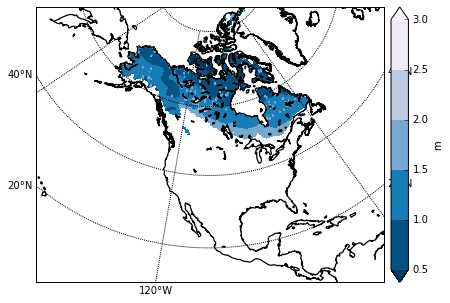

Simulated ALT:
Max: 4.13191919382 m 75% =  1.32973445174
Min: 0.031967343002 m 25% =  0.708916951301


(array([  2.48000000e+02,   1.80000000e+03,   1.99200000e+03,
          1.36900000e+03,   3.94000000e+02,   7.00000000e+00,
          2.00000000e+00,   0.00000000e+00,   5.00000000e+00,
          1.00000000e+00]),
 array([ 0.03196734,  0.44196253,  0.85195771,  1.2619529 ,  1.67194808,
         2.08194327,  2.49193845,  2.90193364,  3.31192882,  3.72192401,
         4.13191919]),
 <a list of 10 Patch objects>)

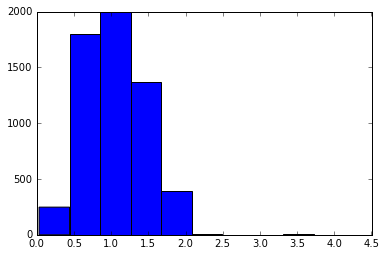

In [3]:
fig=plt.figure(figsize=(8,4.5))

ax = fig.add_axes([0.05,0.05,0.9,0.85])

m = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax)

X, Y = m(LONS, LATS)

m.drawcoastlines(linewidth=1.25)
# m.fillcontinents(color='0.8')
m.drawparallels(np.arange(-80,81,20),labels=[1,1,0,0])
m.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])

clev = np.array([0.5, 1.0, 1.5, 2.0, 2.5, 3.0])
cs = m.contourf(X, Y, ALT, clev, cmap=plt.cm.PuBu_r, extend='both')

cbar = m.colorbar(cs)
cbar.set_label('m')

plt.show()

# print x._values["ALT"][:]
ALT2 = np.reshape(ALT, np.size(ALT))
ALT2 = ALT2[np.where(~np.isnan(ALT2))]

print 'Simulated ALT:'
print 'Max:', np.nanmax(ALT2),'m', '75% = ', np.percentile(ALT2, 75)
print 'Min:', np.nanmin(ALT2),'m', '25% = ', np.percentile(ALT2, 25)

plt.hist(ALT2)

Spatially visualize mean annual ground temperature:

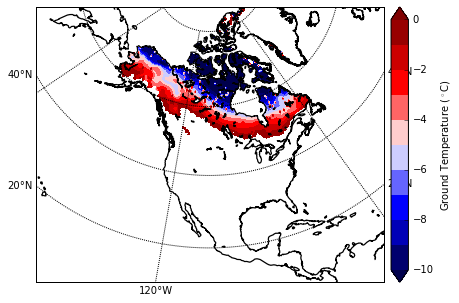

(array([   32.,   221.,   349.,   399.,   305.,   636.,   596.,   937.,
         1084.,  1259.]),
 array([ -2.11404932e+01,  -1.90264441e+01,  -1.69123950e+01,
         -1.47983459e+01,  -1.26842969e+01,  -1.05702478e+01,
         -8.45619870e+00,  -6.34214961e+00,  -4.22810053e+00,
         -2.11405144e+00,  -2.35981496e-06]),
 <a list of 10 Patch objects>)

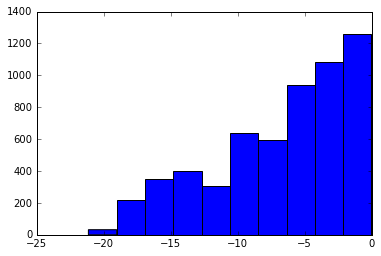

In [4]:
fig2=plt.figure(figsize=(8,4.5))

ax2 = fig2.add_axes([0.05,0.05,0.9,0.85])

m2 = Basemap(llcrnrlon=-145.5,llcrnrlat=1.,urcrnrlon=-2.566,urcrnrlat=46.352,\
            rsphere=(6378137.00,6356752.3142),\
            resolution='l',area_thresh=1000.,projection='lcc',\
            lat_1=50.,lon_0=-107.,ax=ax2)

X, Y = m2(LONS, LATS)

m2.drawcoastlines(linewidth=1.25)
# m.fillcontinents(color='0.8')
m2.drawparallels(np.arange(-80,81,20),labels=[1,1,0,0])
m2.drawmeridians(np.arange(0,360,60),labels=[0,0,0,1])

clev = np.linspace(start=-10, stop=0, num =11)
cs2 = m2.contourf(X, Y, TTOP, clev, cmap=plt.cm.seismic, extend='both')

cbar2 = m2.colorbar(cs2)
cbar2.set_label('Ground Temperature ($^\circ$C)')

plt.show()

# # print x._values["ALT"][:]
TTOP2 = np.reshape(TTOP, np.size(TTOP))
TTOP2 = TTOP2[np.where(~np.isnan(TTOP2))]

# Hist plot:
plt.hist(TTOP2)

In [4]:
mask = x._model.mask

In [5]:
print np.shape(mask)

(131, 281)


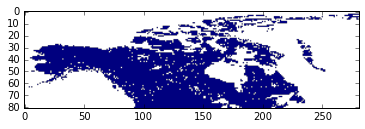

In [5]:
plt.imshow(mask)

In [11]:
print np.nanmin(x._model.tot_percent)

1.0
